# Final Project

### Use Kaggle Dataset to predict housing values based on the median income of the population

In [1]:
#import ALL THE THINGS!!!

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
from sklearn import metrics
import re
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import seaborn
from sklearn.cross_validation import cross_val_score

plt.style.use('fivethirtyeight')

/Users/britneeforeman/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Hypothesis: There is a positive association between income and house values

In [2]:
#probably a good idea to have our baseline data set too

orig_data = pd.read_csv('housing.csv')

In [3]:
#what are all the columns that we're working with
for x in orig_data.columns.values:
    print x

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity


In [4]:
#Let's make sure it looks like useful data

orig_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#How many rows are we dealing with?

print len(orig_data)

20640


In [6]:
#Do we have any missing values?

orig_data.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [7]:
orig_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Cleaning

In [8]:
orig_data = pd.get_dummies(orig_data, columns=['ocean_proximity'], drop_first=True)

In [9]:
# orig_data = orig_data.replace(0, np.NaN)
# drop null
orig_data.fillna(orig_data.mean(), inplace=True)
print(orig_data.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [10]:
orig_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
orig_data.count()

longitude                     20640
latitude                      20640
housing_median_age            20640
total_rooms                   20640
total_bedrooms                20640
population                    20640
households                    20640
median_income                 20640
median_house_value            20640
ocean_proximity_INLAND        20640
ocean_proximity_ISLAND        20640
ocean_proximity_NEAR BAY      20640
ocean_proximity_NEAR OCEAN    20640
dtype: int64

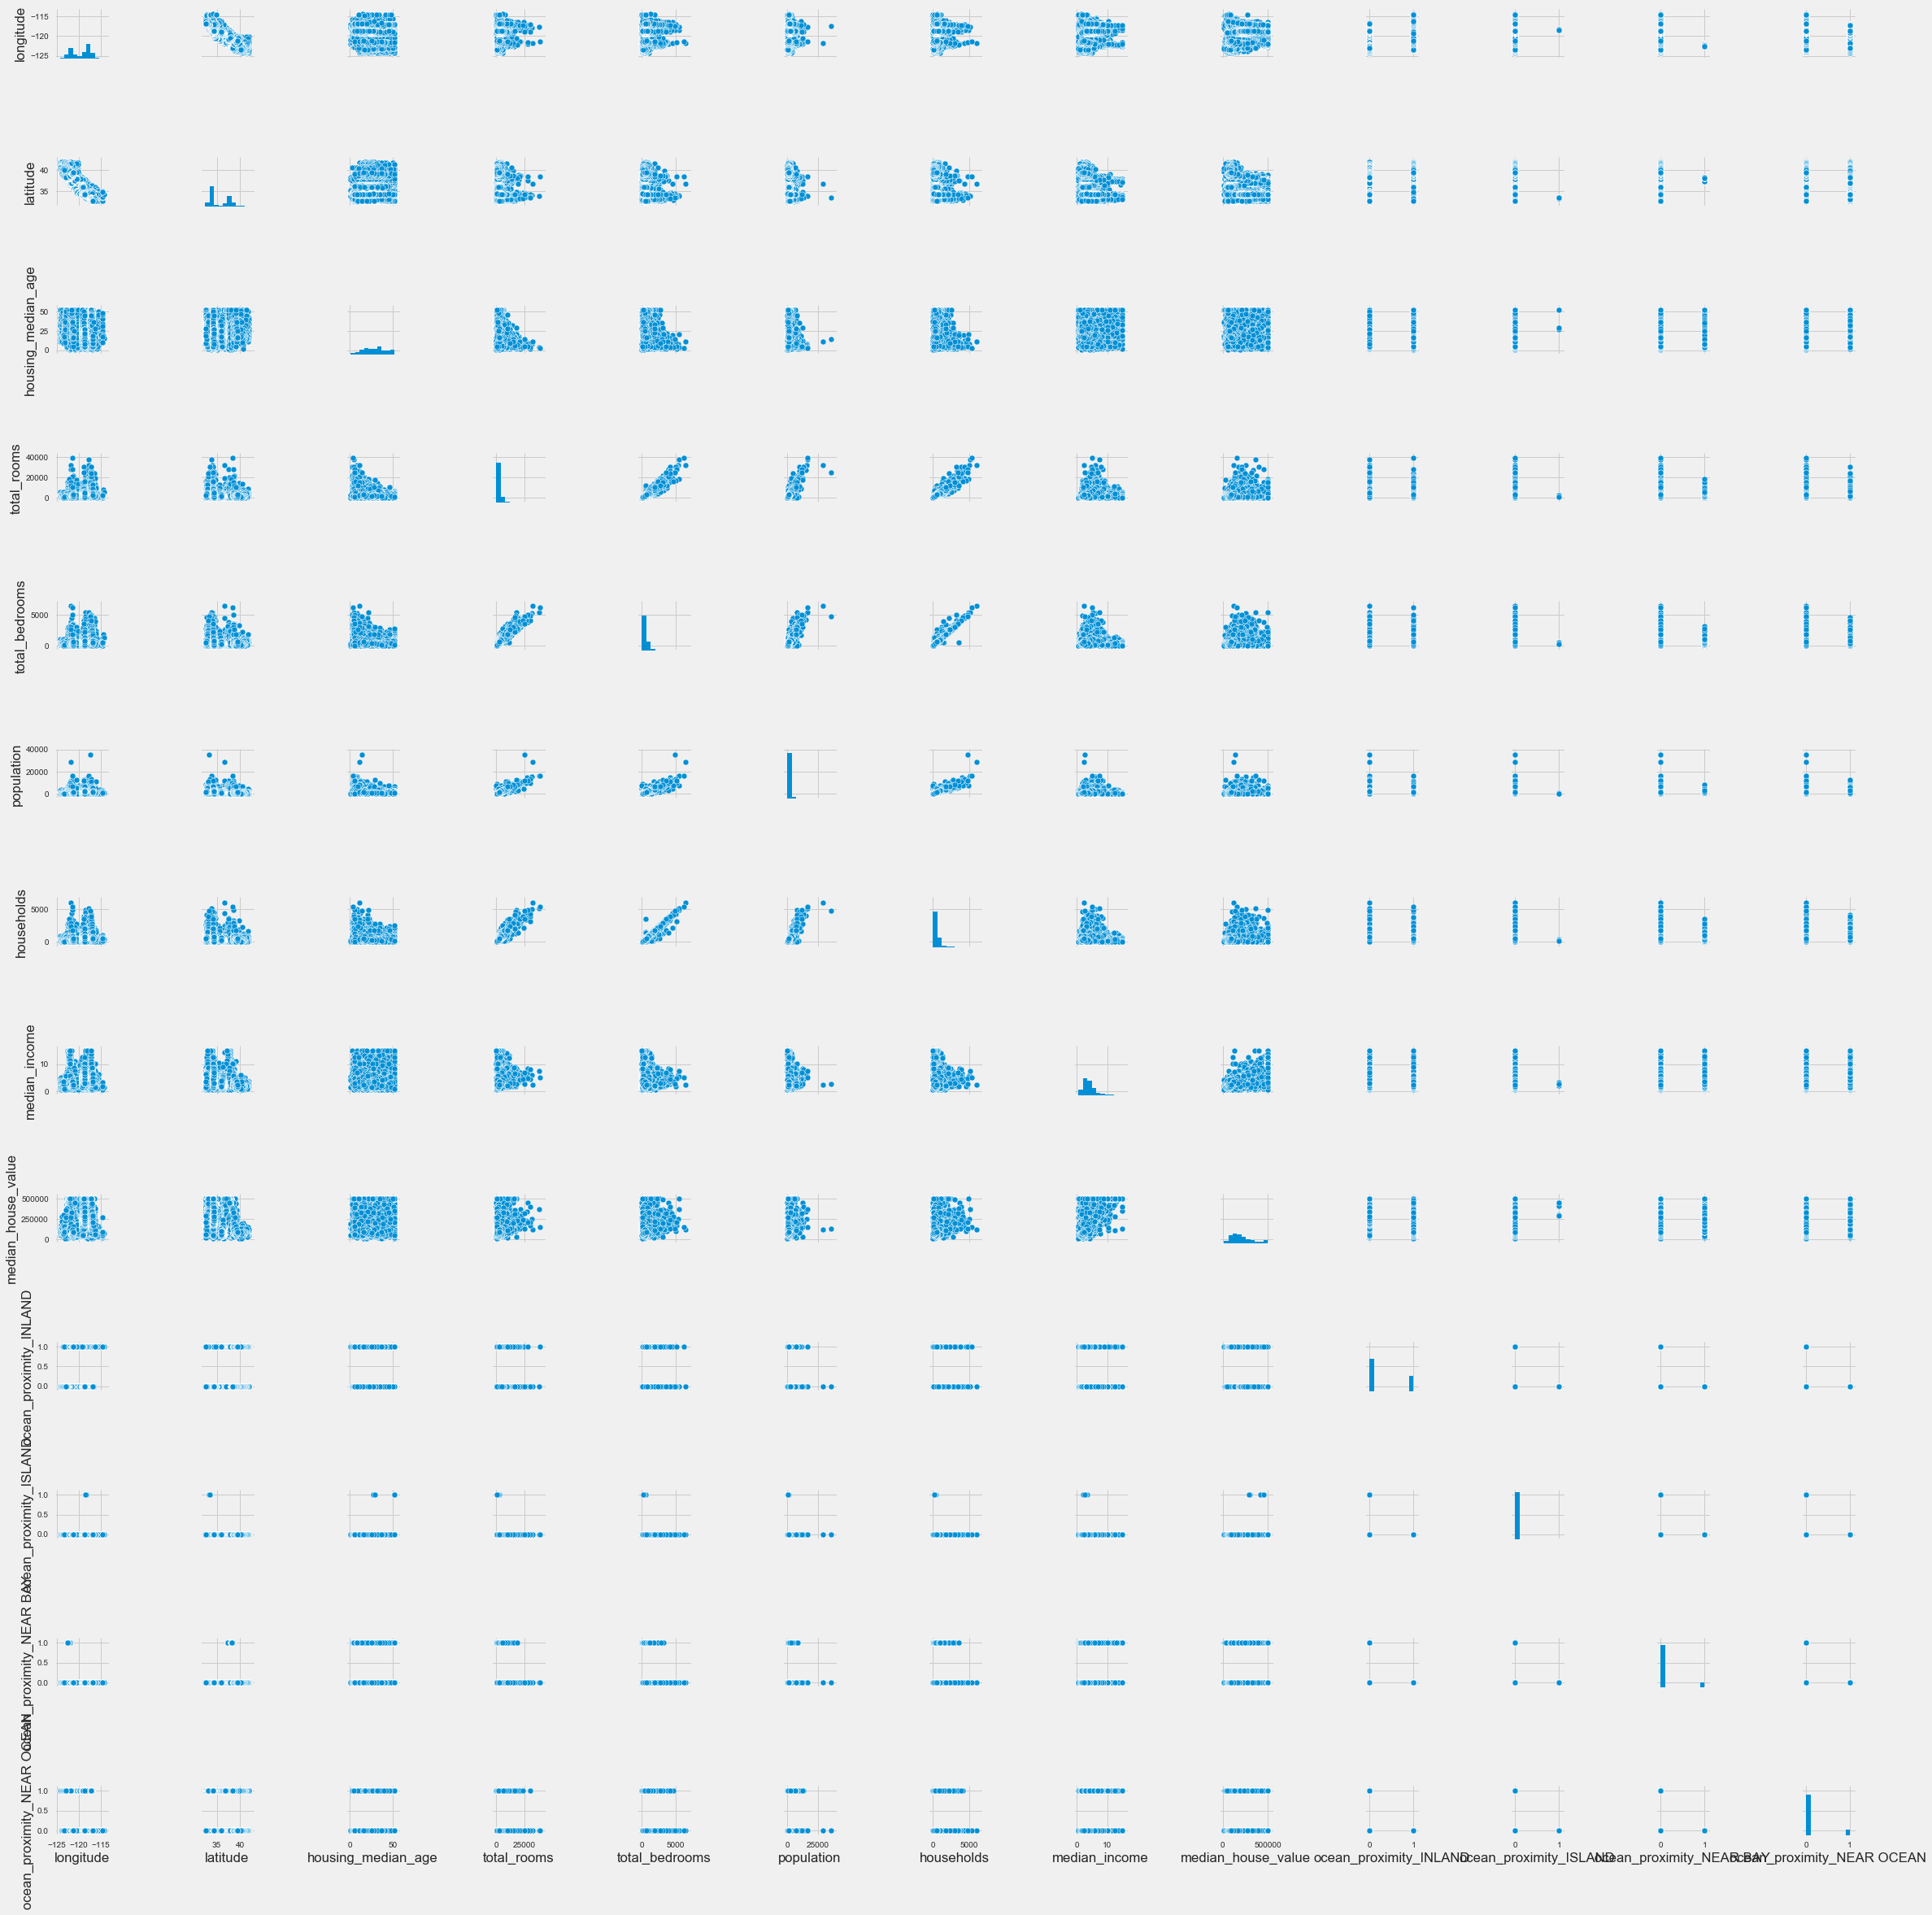

In [107]:
sns.pairplot(orig_data)
sns.plt.show();

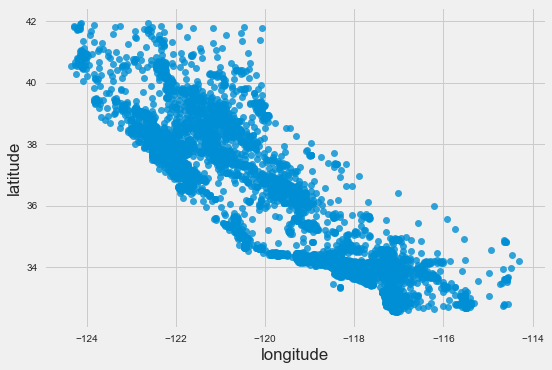

In [111]:
sns.regplot(x="longitude", y="latitude", data = orig_data, fit_reg=False);

### It's California (Kinda)

## Data Analysis

In [12]:
X = orig_data.drop('median_house_value',axis=1) # load the dataset as a pandas data frame
y = orig_data.median_house_value # define the target variable (dependent variable) as y

In [13]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,0,0,1,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,0,0,1,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,0,0,1,0


In [14]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(16512, 12) (16512,)
(4128, 12) (4128,)


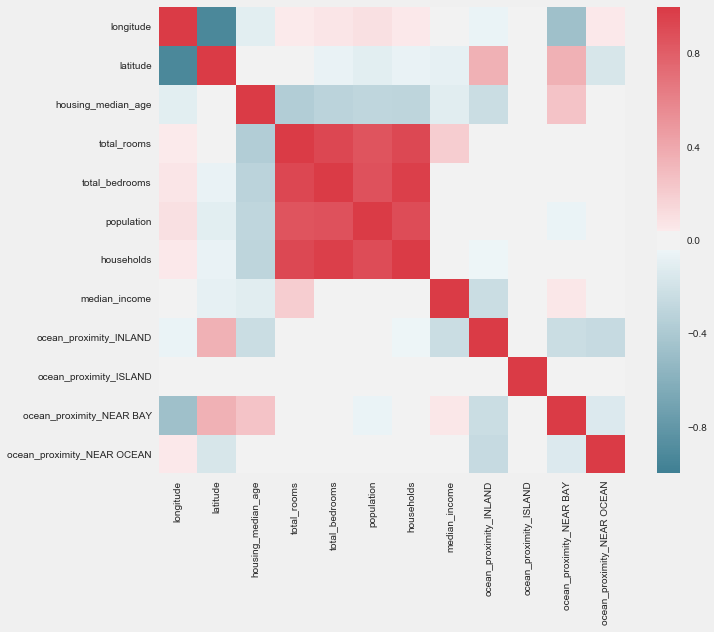

In [15]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = X_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

In [16]:
def reject_outliers(X_train, m = 2.):
    d = np.abs(X_train - np.median(X_train))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return orig_data[s<m]

In [36]:
model = RandomForestClassifier(n_estimators=800, n_jobs=-1, max_depth=8, random_state=1)
%time cross_val_score(model, X_train, y_train).mean()

CPU times: user 18min 46s, sys: 3min 19s, total: 22min 6s
Wall time: 6min 31s


0.051168400592979758

In [128]:
>>> from sklearn.ensemble import RandomForestRegressor
>>> from sklearn.datasets import make_regression

X_train, y_train = make_regression(n_features=12, n_informative=4,
...                        random_state=1, shuffle=False)
>>> regr = RandomForestRegressor(max_depth=2, random_state=0)
>>> regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [129]:
#What is the most important
>>> print(regr.feature_importances_)

[ 0.7160517   0.01391163  0.26108027  0.          0.          0.          0.
  0.          0.          0.          0.0089564   0.        ]


In [130]:
#let's get the MSE for our model
print(regr.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

[ 0.55640238]


### Conclusion

Hypothesis isn't null but it turns out the most important coefficient isn't income, but location. The next step would be to find out if there are specific locations that index higher than others within the same category of close to water. That would be a classifier analysis.